In [1]:
import sys

import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt

sys.path.append("..")

import gc
import os
import subprocess
from collections.abc import Iterable
from glob import glob
from os.path import abspath, dirname, join
from statistics import mode

import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch.optim
from IPython.display import HTML, display
from joblib import Parallel, delayed
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
from millify import millify
from PIL import Image
from scipy.ndimage import distance_transform_edt, gaussian_filter
from seaborn import color_palette
from skimage import transform
from skimage import measure
from skimage.color import label2rgb
# load label
from skimage.measure import find_contours, label
from tqdm import tqdm

from pred2raster import pred2raster
from sample_selection import *
from src.io_operations import (fix_relative_paths, load_args, read_tiff,
                               read_yaml)
from utils import *

In [2]:
sns.set_context("paper")
sns.set_style("white")

In [3]:
VERSION_FOLDER = "../13_amazon_data"
ITER_FOLDER = "iter_020"

In [4]:
id_tree = pd.read_csv(
    "../amazon_input_data/id_trees.csv"
).set_index("label_num")["tree_name"]

In [5]:
args = read_yaml(join(VERSION_FOLDER, 'args.yaml'))

In [6]:
all_labels_set = read_tiff(join(VERSION_FOLDER, ITER_FOLDER, "new_labels", "all_labels_set.tif"))

In [7]:
ORTHOIMAGE = read_tiff(args.ortho_image)
ORTHOIMAGE = ORTHOIMAGE.transpose(1, 2, 0)

# Recorte de Segmentação

In [ ]:
plt.imshow(all_labels_set)

In [ ]:
image_cut = slice(5_000, 10_000), slice(30_000, 40_000)

fig, ax = plt.subplots()
ax.imshow(ORTHOIMAGE[image_cut])

for contour in find_contours(all_labels_set[image_cut]):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="red")

ax.axis("off")
# # plt.tight_layout()
# # remove borders
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()

# Evolução do Shape de uma Copa

In [ ]:
SYNTHETIC_VIEW_PATHS = glob(join(VERSION_FOLDER, "visualization", "synthetic_all_labels", "*.png"))
# synthetic_view = plt.imread()

In [ ]:
plt.figure(dpi=200)
plt.imshow(segmentation)


In [ ]:


segmentation = plt.imread(SYNTHETIC_VIEW_PATHS[3])
# set size
plt.figure(dpi=100)
plt.imshow(segmentation[1250:1350, 2400:2600])
#set grids True
plt.grid(True)


In [ ]:

plt.imshow(ORTHOIMAGE)
plt.grid(True)
plt.show()

In [59]:
ALL_LABELS_PATHS = [join(VERSION_FOLDER, f"iter_{iter:03d}", "new_labels", "all_labels_set.tif") for iter in range(1, 21)]

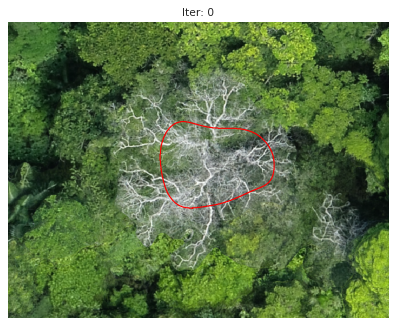

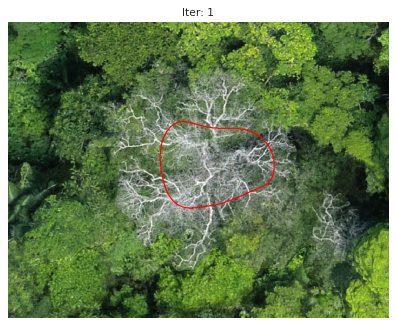

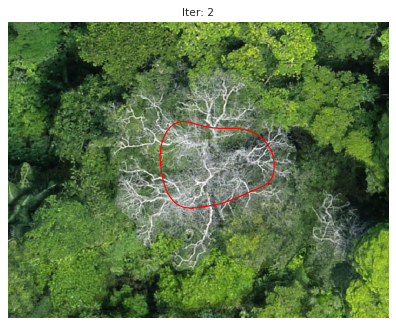

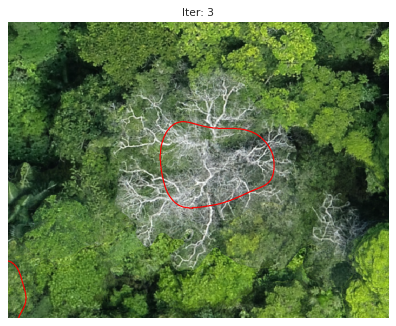

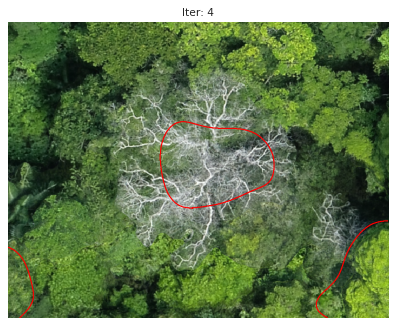

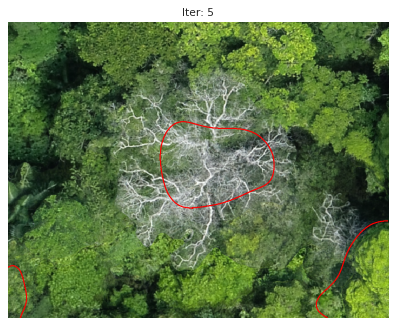

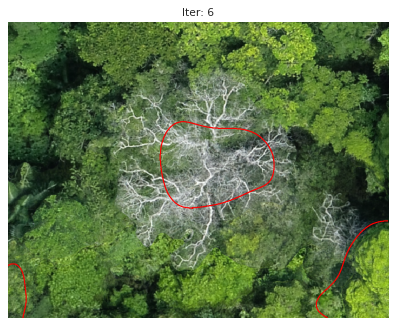

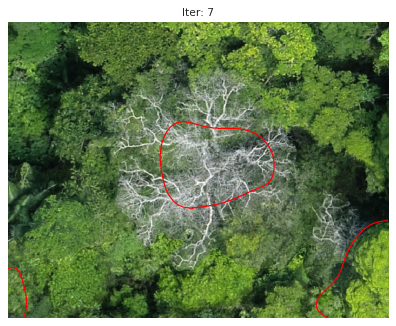

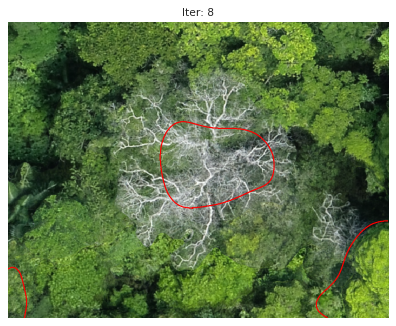

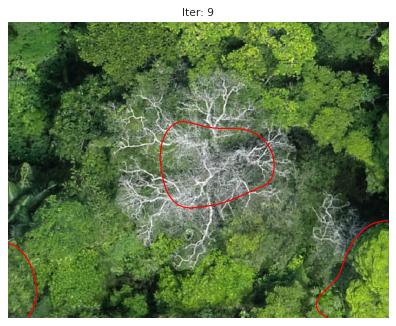

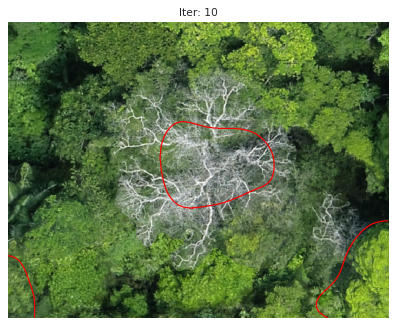

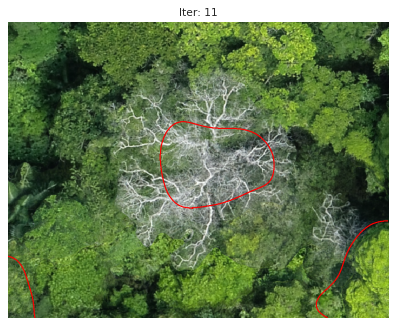

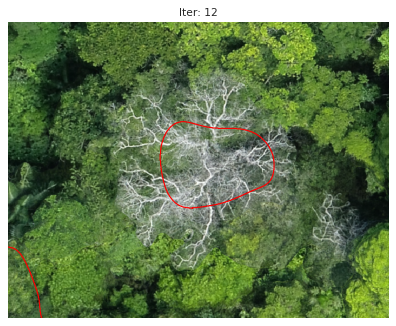

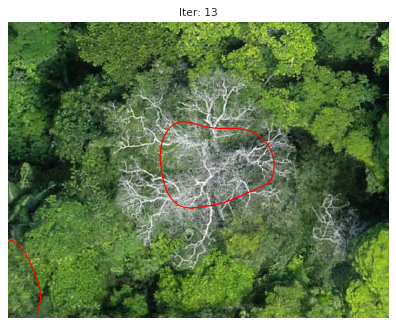

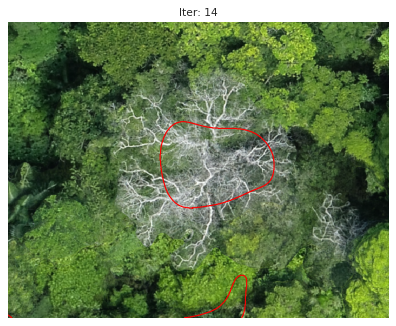

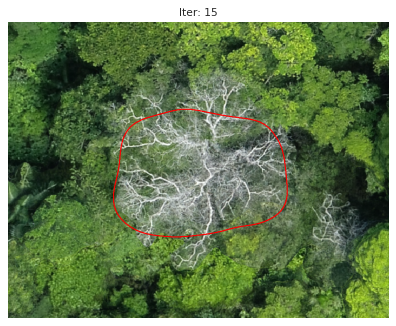

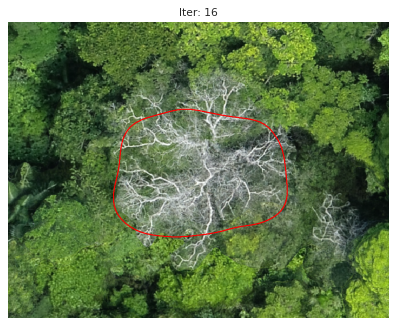

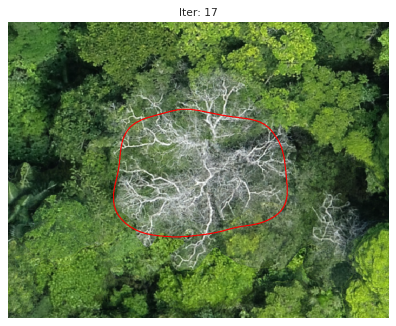

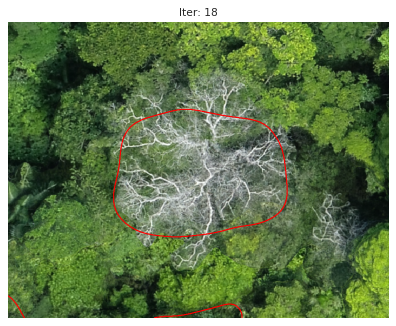

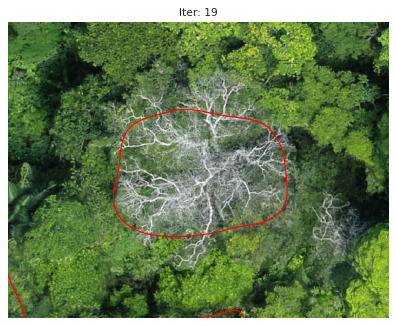

In [55]:
image_cut = slice(11_300, 12_000), slice(21_500, 22_400)

for num, all_label_path in enumerate(ALL_LABELS_PATHS):
    
    fig, ax = plt.subplots(dpi = 80)
    ax.set_title(f"Iter: {num}")
    ax.imshow(ORTHOIMAGE[image_cut])

    all_labels_set_at_iter = read_tiff(all_label_path)
    for contour in find_contours(all_labels_set_at_iter[image_cut]):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="red")

    ax.axis("off")

    plt.show()

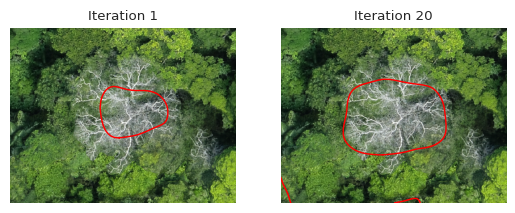

In [64]:
image_cut = slice(11_300, 12_000), slice(21_500, 22_400)
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(ORTHOIMAGE[image_cut])
ax[1].imshow(ORTHOIMAGE[image_cut])

all_labels_set_at_iter = read_tiff(ALL_LABELS_PATHS[0])

ax[0].set_title("Iteration 1")
for contour in find_contours(all_labels_set_at_iter[image_cut]):
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth=1, color="red")

ax[0].axis("off")

ax[1].set_title("Iteration 20")
all_labels_set_at_iter = read_tiff(ALL_LABELS_PATHS[-1])
for contour in find_contours(all_labels_set_at_iter[image_cut]):
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=1, color="red")

ax[1].axis("off")

plt.show()

In [ ]:
image_cut = slice(11_300, 12_000), slice(21_500, 22_400)
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(ORTHOIMAGE[image_cut])
ax[1].imshow(ORTHOIMAGE[image_cut])

all_labels_set_at_iter = read_tiff(ALL_LABELS_PATHS[0])

ax[0].set_title("Iteration 1")
for contour in find_contours(all_labels_set_at_iter[image_cut]):
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth=1, color="red")

ax[0].axis("off")

ax[1].set_title("Iteration 20")
all_labels_set_at_iter = read_tiff(ALL_LABELS_PATHS[-1])
for contour in find_contours(all_labels_set_at_iter[image_cut]):
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=1, color="red")

ax[1].axis("off")

plt.show()